# EDA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%config IPCompleter.greedy=True

In [2]:
cat = pd.read_pickle('../../02_Data/03_Work/cat_result_quality.pickle')
num = pd.read_pickle('../../02_Data/03_Work/num_result_quality.pickle')


## Categoric

#### Statistic

In [11]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21280 entries, 2013-01-01 to 2015-11-30
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   store_id      21280 non-null  object
 1   item_id       21280 non-null  object
 2   d             21280 non-null  object
 3   year          21280 non-null  object
 4   month         21280 non-null  object
 5   wday          21280 non-null  object
 6   weekday       21280 non-null  object
 7   event_name_1  21280 non-null  object
 8   event_type_1  21280 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [3]:
cat.columns.to_list()

['store_id',
 'item_id',
 'd',
 'year',
 'month',
 'wday',
 'weekday',
 'event_name_1',
 'event_type_1']

In [4]:
# exclude d
include = cat.columns.to_list()
del include[2]

In [12]:
def frequencies_cat(df_cat):
    #ensure str in all columns
    df_cat = df_cat.astype(str)
    
    result = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Value',0: "Frequency"})\
                .sort_values(by = ['Variable','Frequency'])
    return(result)


In [14]:
pd.set_option('display.max_rows', None) # to see all

frequencies_cat(cat[include])

,Variable,Value,Frequency
41,event_name_1,Chanukah End,0.001880
42,event_name_1,Christmas,0.001880
43,event_name_1,Cinco De Mayo,0.001880
48,event_name_1,Father's day,0.001880
62,event_name_1,OrthodoxEaster,0.001880
44,event_name_1,ColumbusDay,0.002820
45,event_name_1,Easter,0.002820
46,event_name_1,Eid al-Fitr,0.002820
47,event_name_1,EidAlAdha,0.002820
49,event_name_1,Halloween,0.002820


In [15]:
pd.set_option('display.max_rows', 6)

#### Graphical

In [17]:
def plot_eda_categoricals(cat):
    
    #Calculate number of rows we need
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    #Define the graph
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    # Flatten to iterate through the graph as if it ose 1D instead of 2D
    ax = ax.flat 

    # Create the loop that adds graphs
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

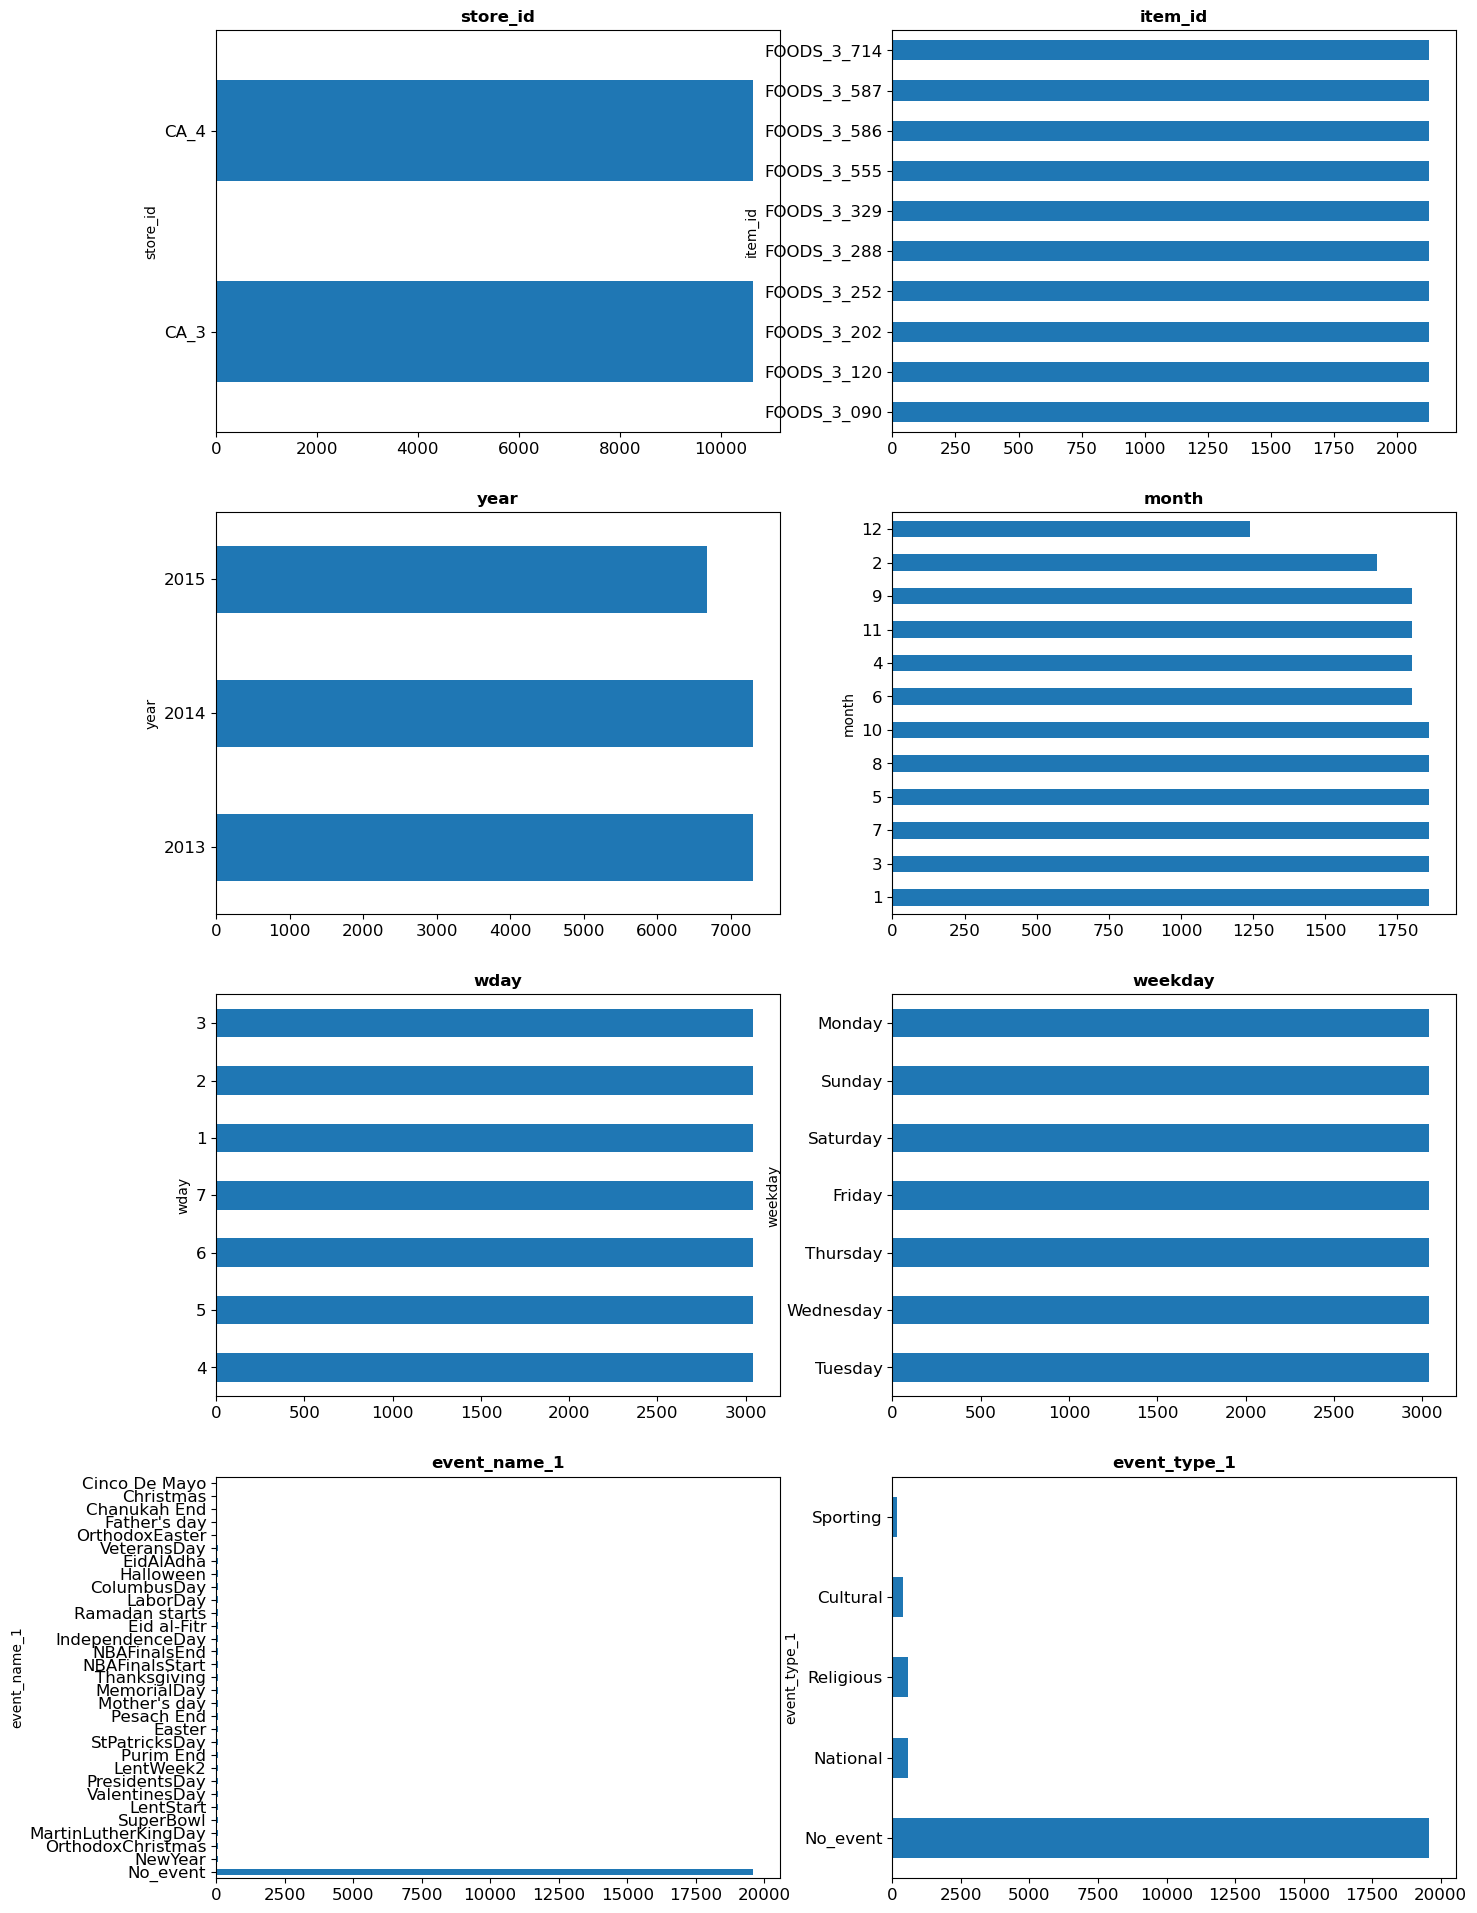

In [19]:
plot_eda_categoricals(cat[include])

## EDA Numeric

#### Statistic

In [20]:
def stats_cont(num):
    
    stats = num.describe().T
    stats['median'] = num.median()
    stats = stats.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(stats)
stats_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,11420.00,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
sales,21280.0,28.874577,18.00,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21280.0,2.394261,1.58,1.236042,1.0,1.5,1.58,2.98,4.98


#### Graphic

In [23]:
df = pd.concat([cat,num], axis=1)
df.head()

,store_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1,wm_yr_wk,sales,sell_price
date,,,,,,,,,,,,
2013-01-01,CA_3,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,1.25
2013-01-01,CA_3,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
2013-01-01,CA_3,FOODS_3_202,d_704,2013,1,4,Tuesday,NewYear,National,11249,20,4.28
2013-01-01,CA_3,FOODS_3_252,d_704,2013,1,4,Tuesday,NewYear,National,11249,34,1.48
2013-01-01,CA_3,FOODS_3_288,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,1.50


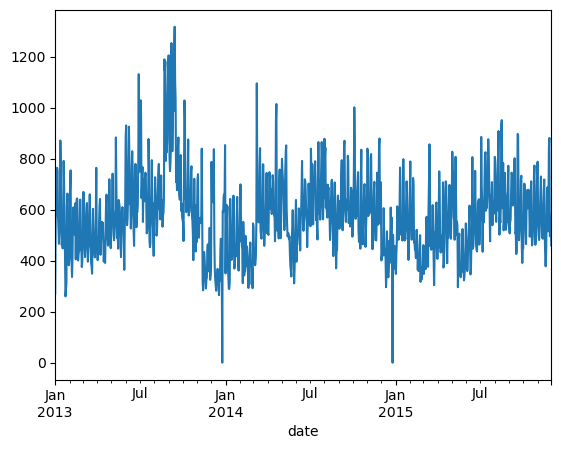

In [24]:
# global trend of sales

df.groupby('date').sales.sum().plot();

##### sales trend by product

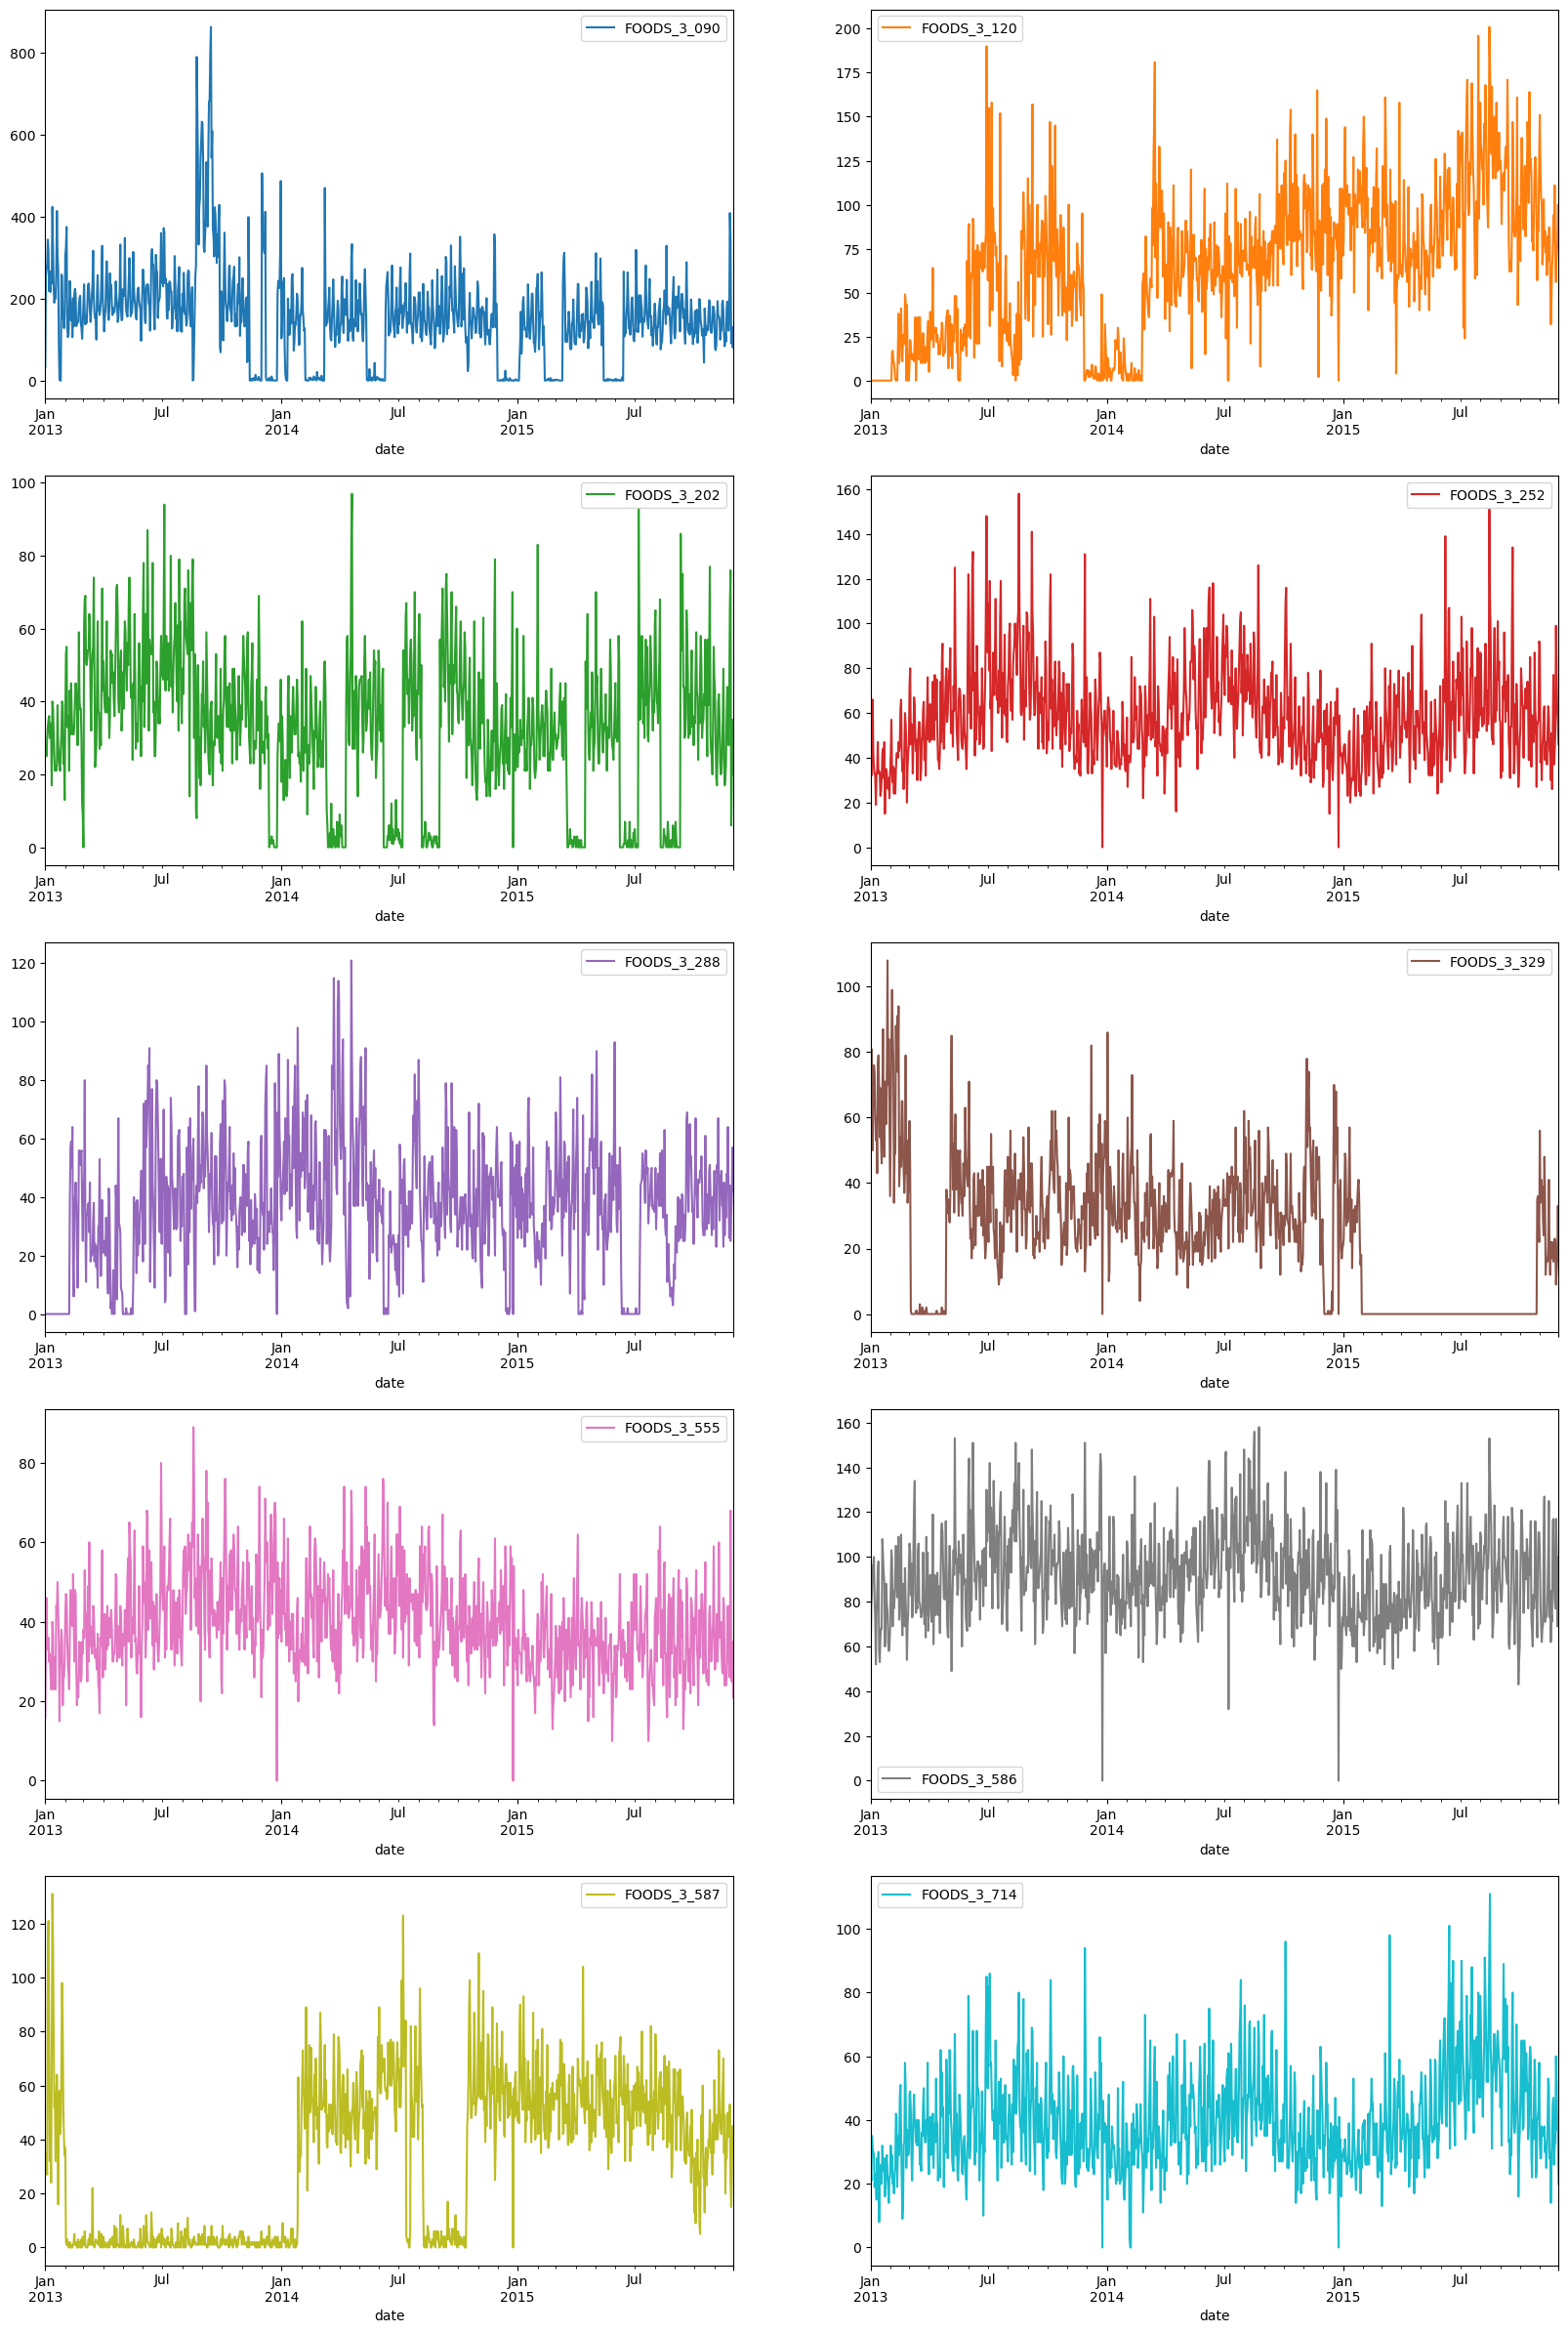

In [30]:
# sales trend by product
df.groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));


##### sales trend by product and shop

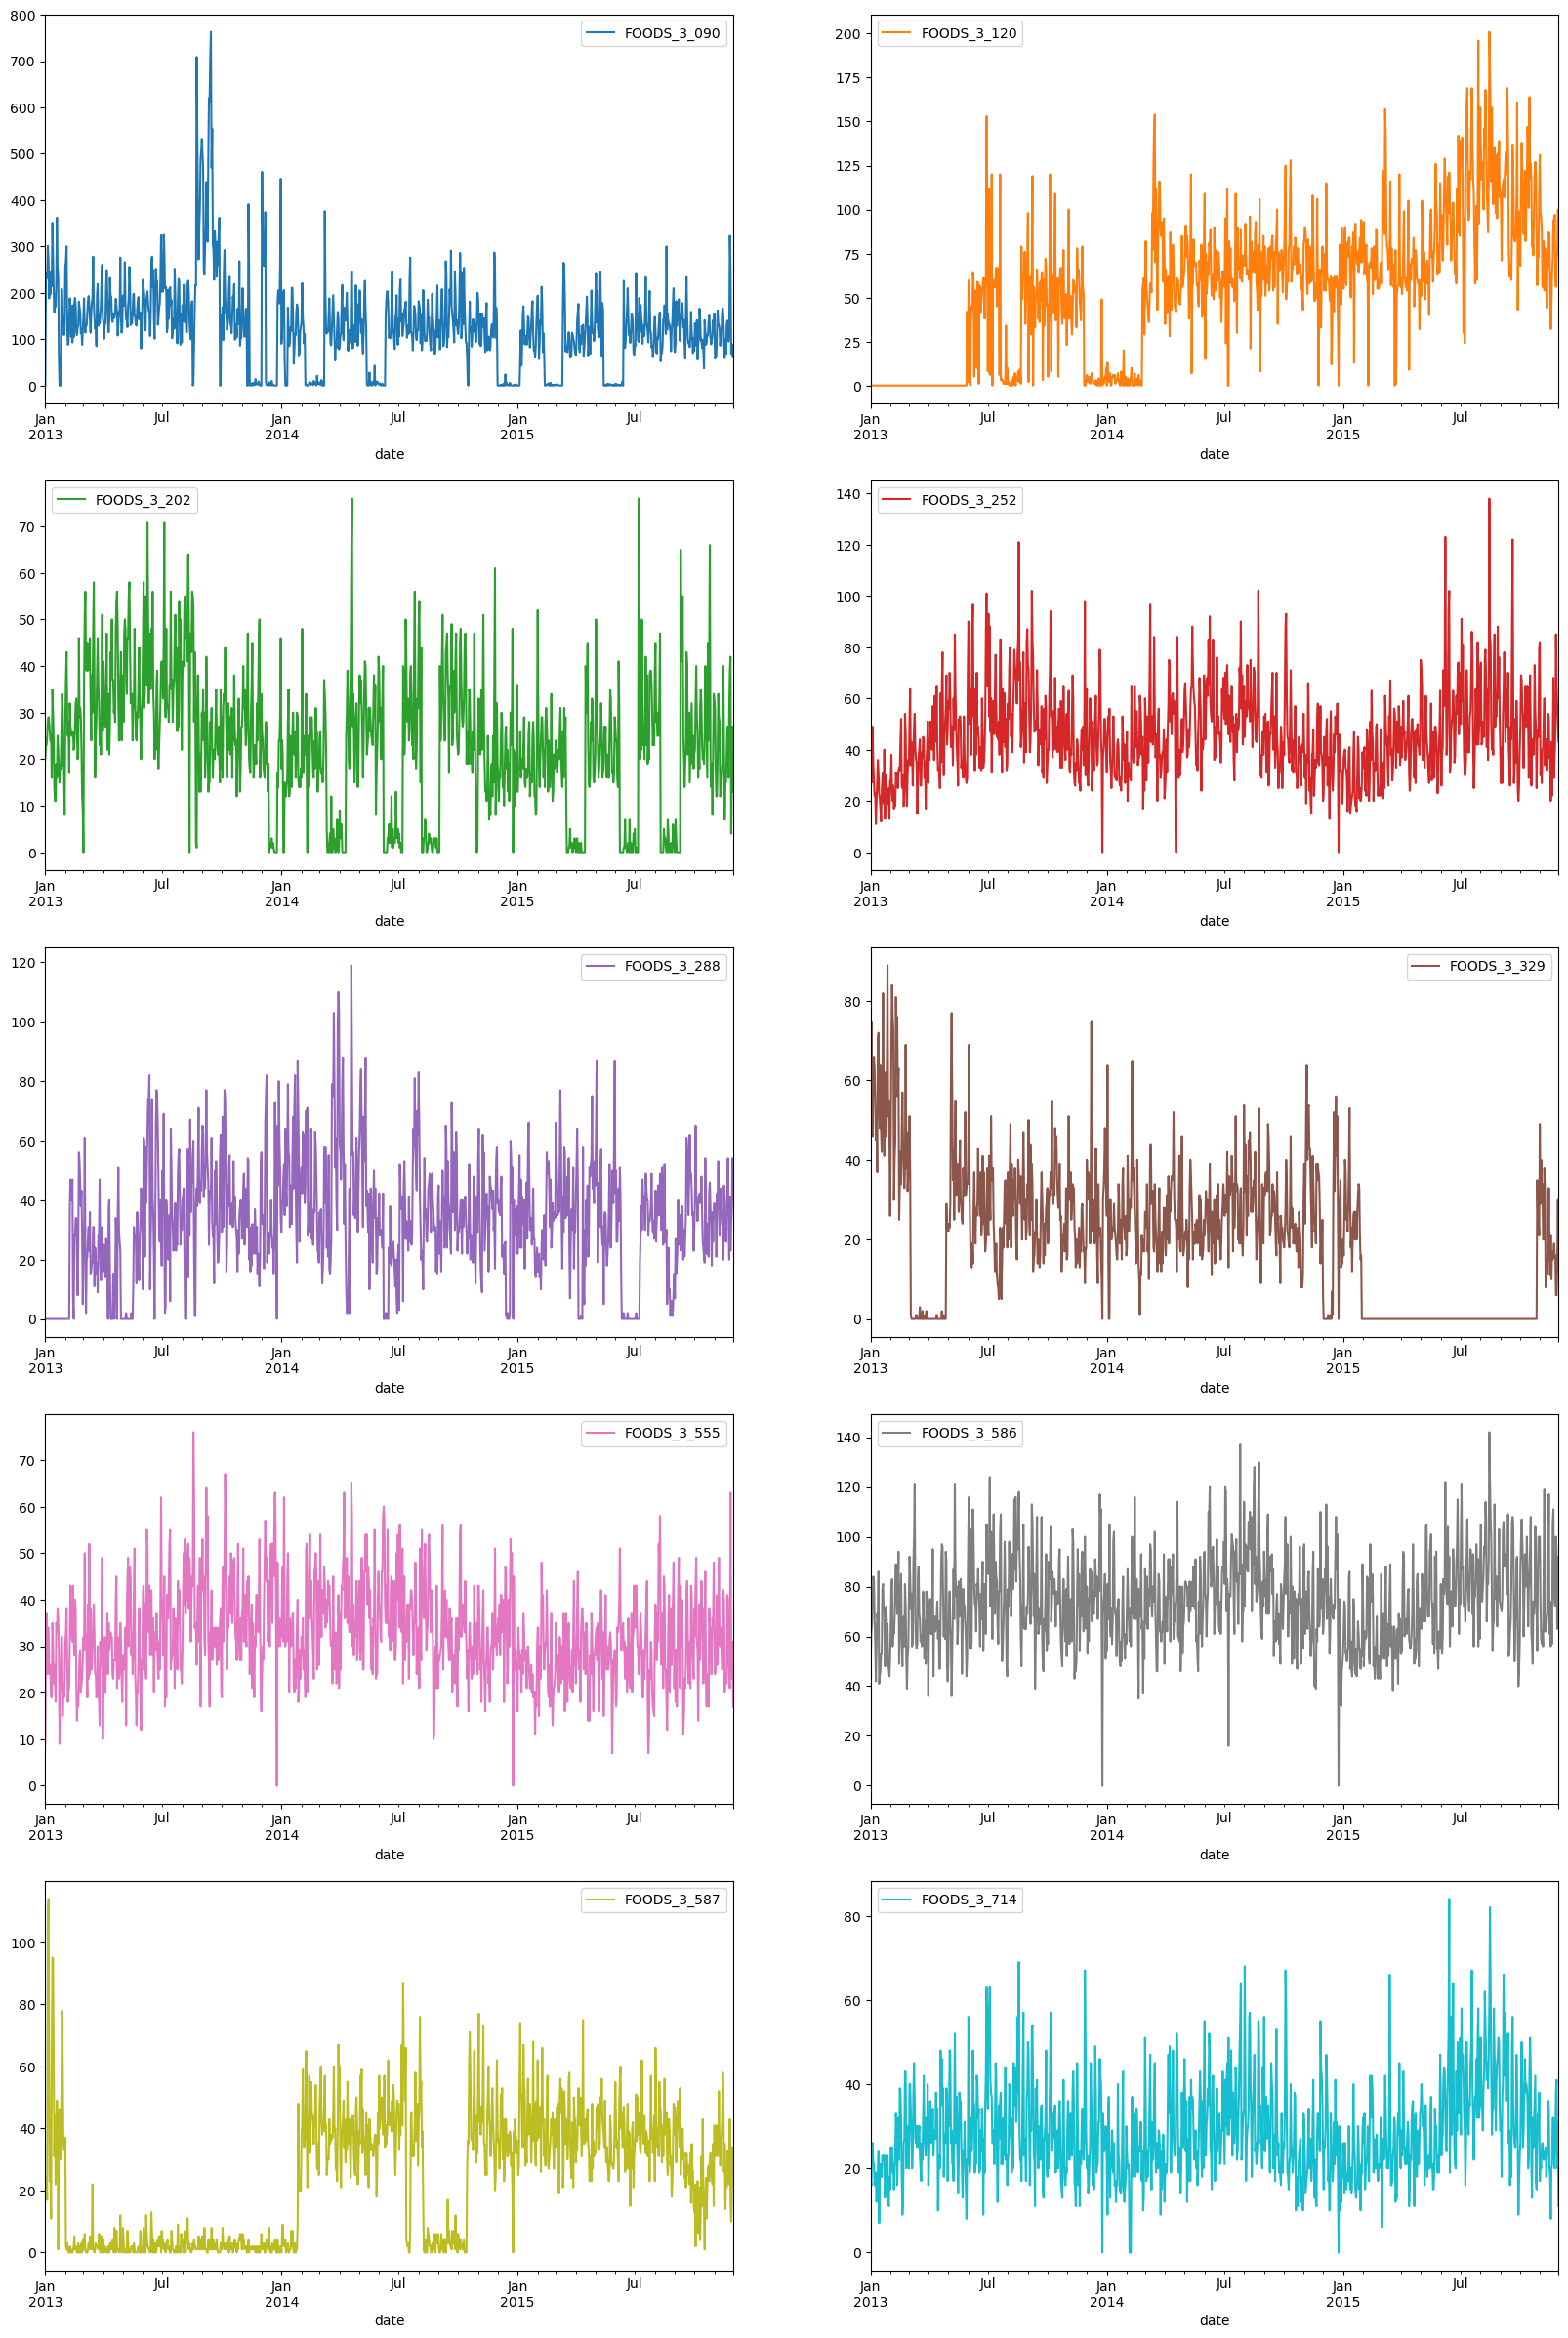

In [28]:

# sales trend by product and shop
df.loc[df.store_id == 'CA_3'].groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));


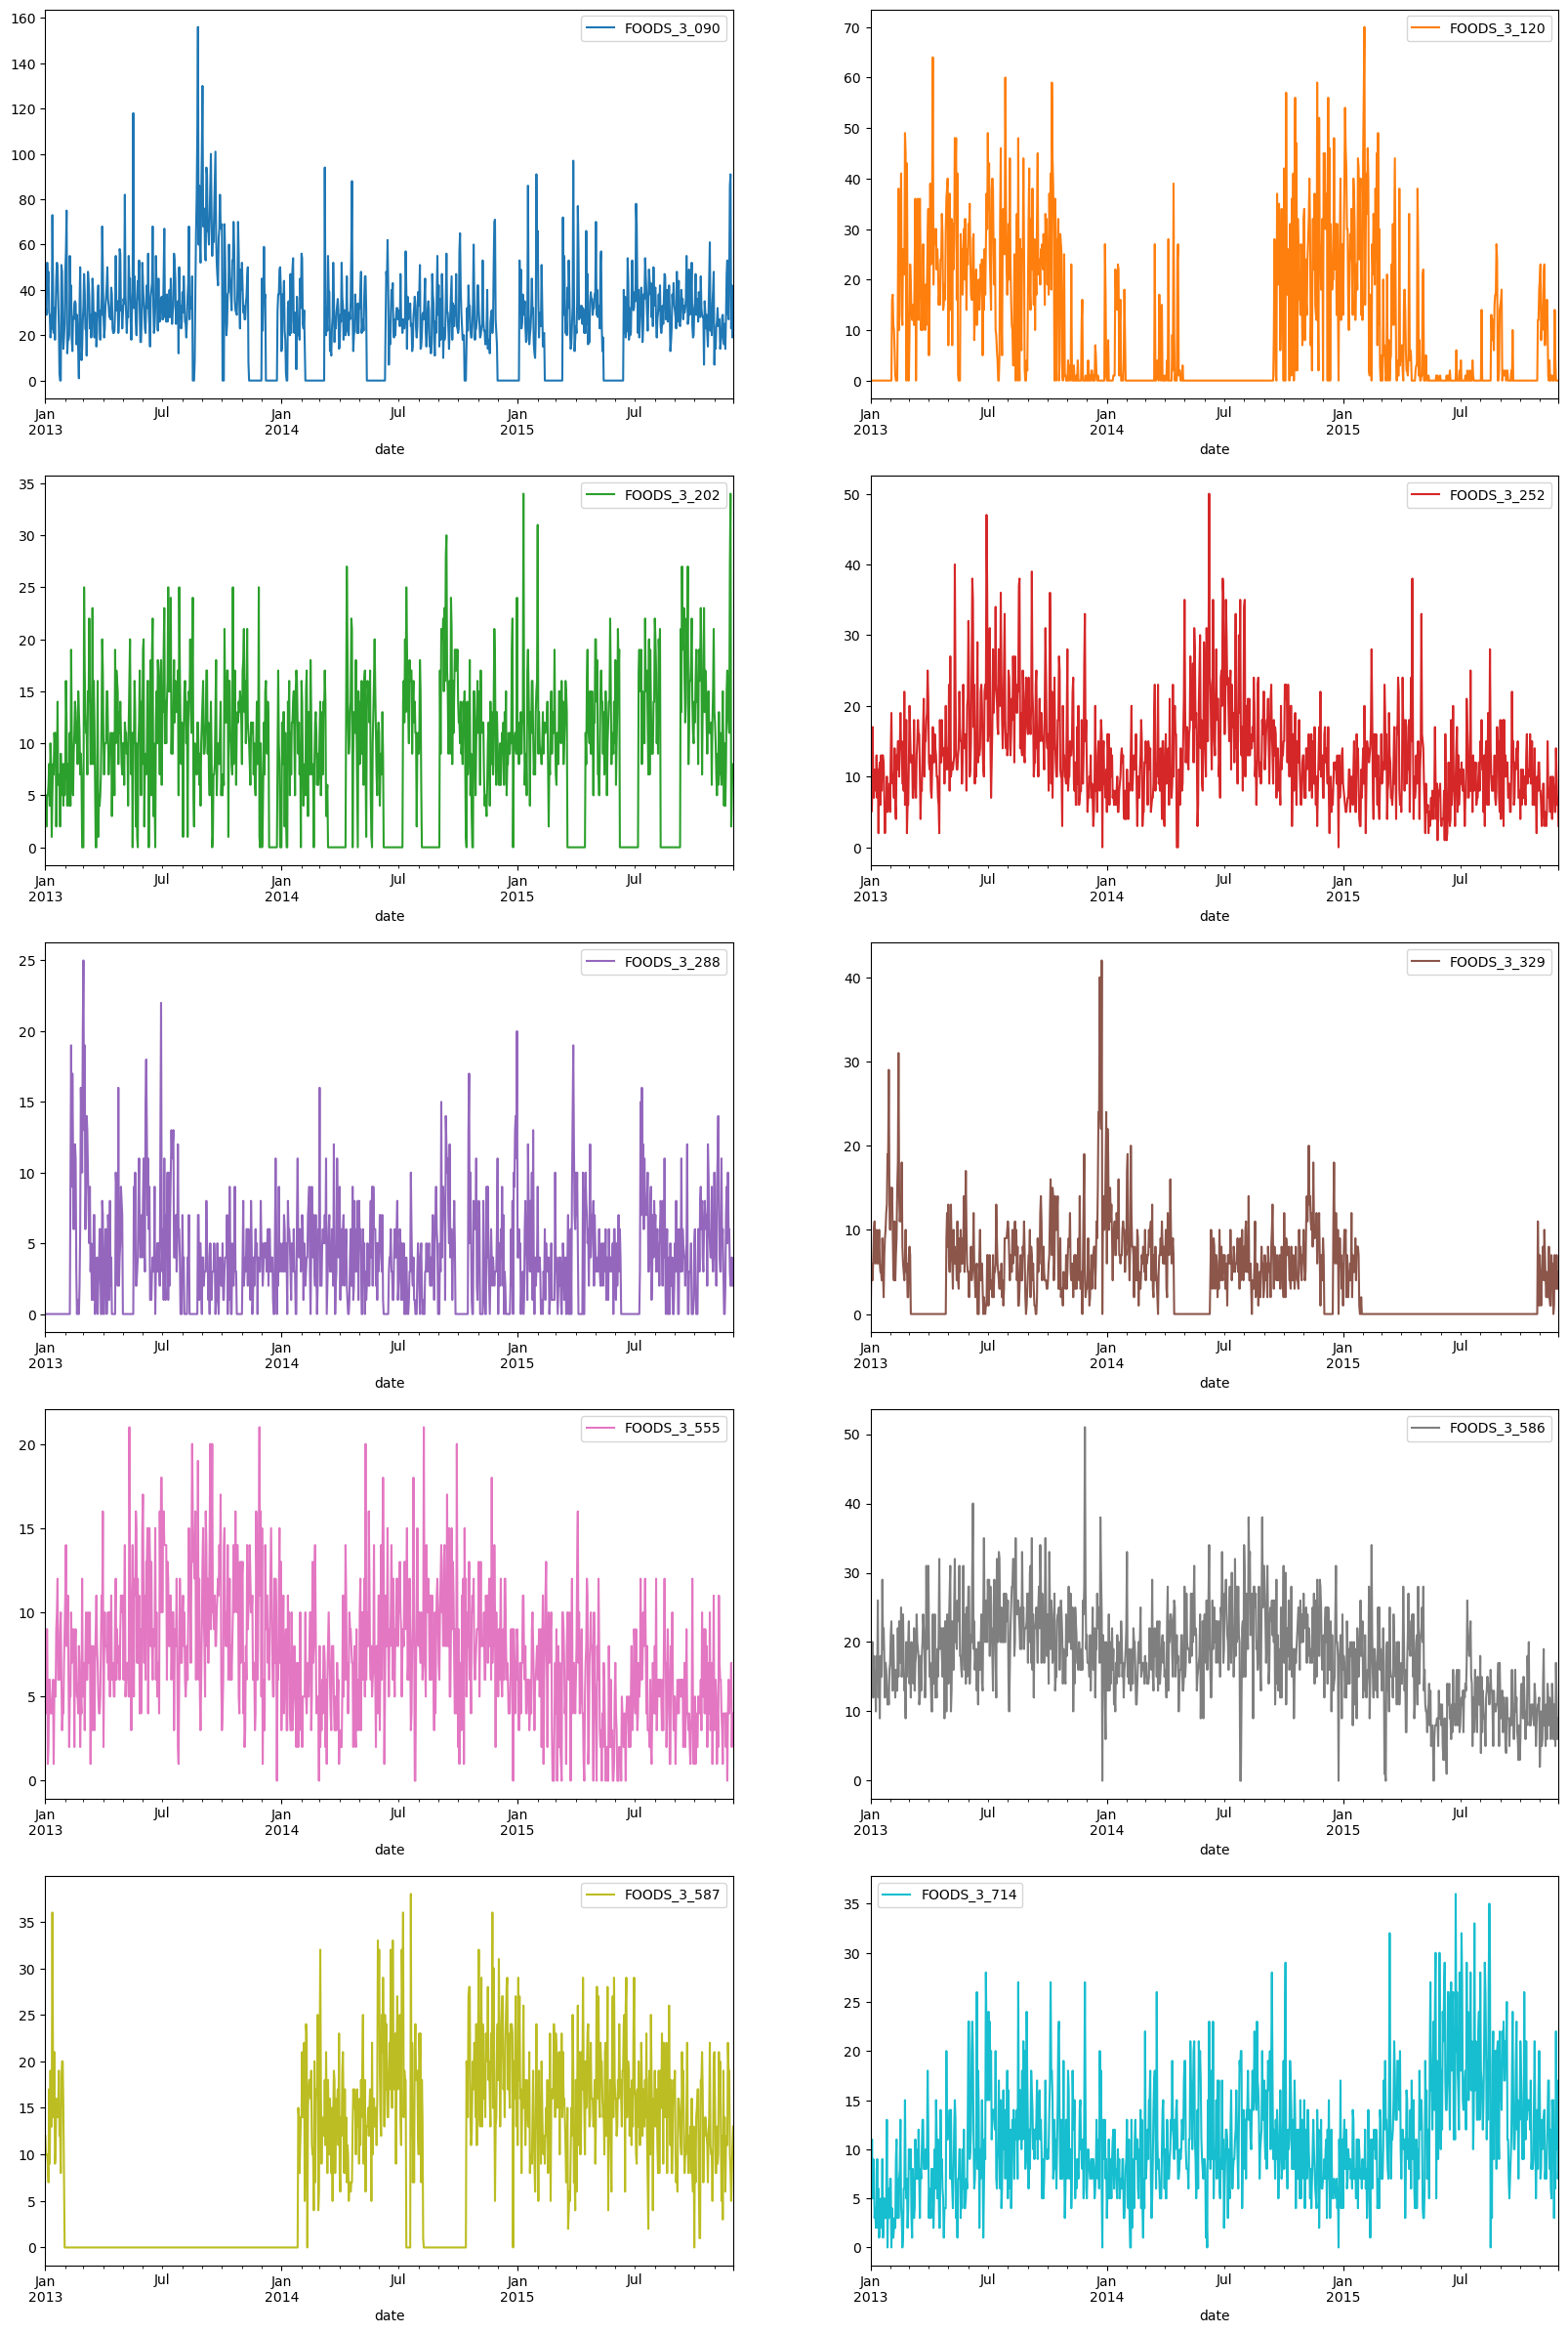

In [29]:

df.loc[df.store_id == 'CA_4'].groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));


* Hierarchical structure
* There are new products at the store level
* not at the general level, so probably not really new products but intermittent demand
* There is intermittent demand
    * We don't know the cause: lack of demand, recall, or out of stock

Actions:

* Model at store-product level
* Create a variable that captures the effect of intermittent demand
* Use fast, tree-based algorithms: XGBoost or lightGBM

##### Price Trend by product

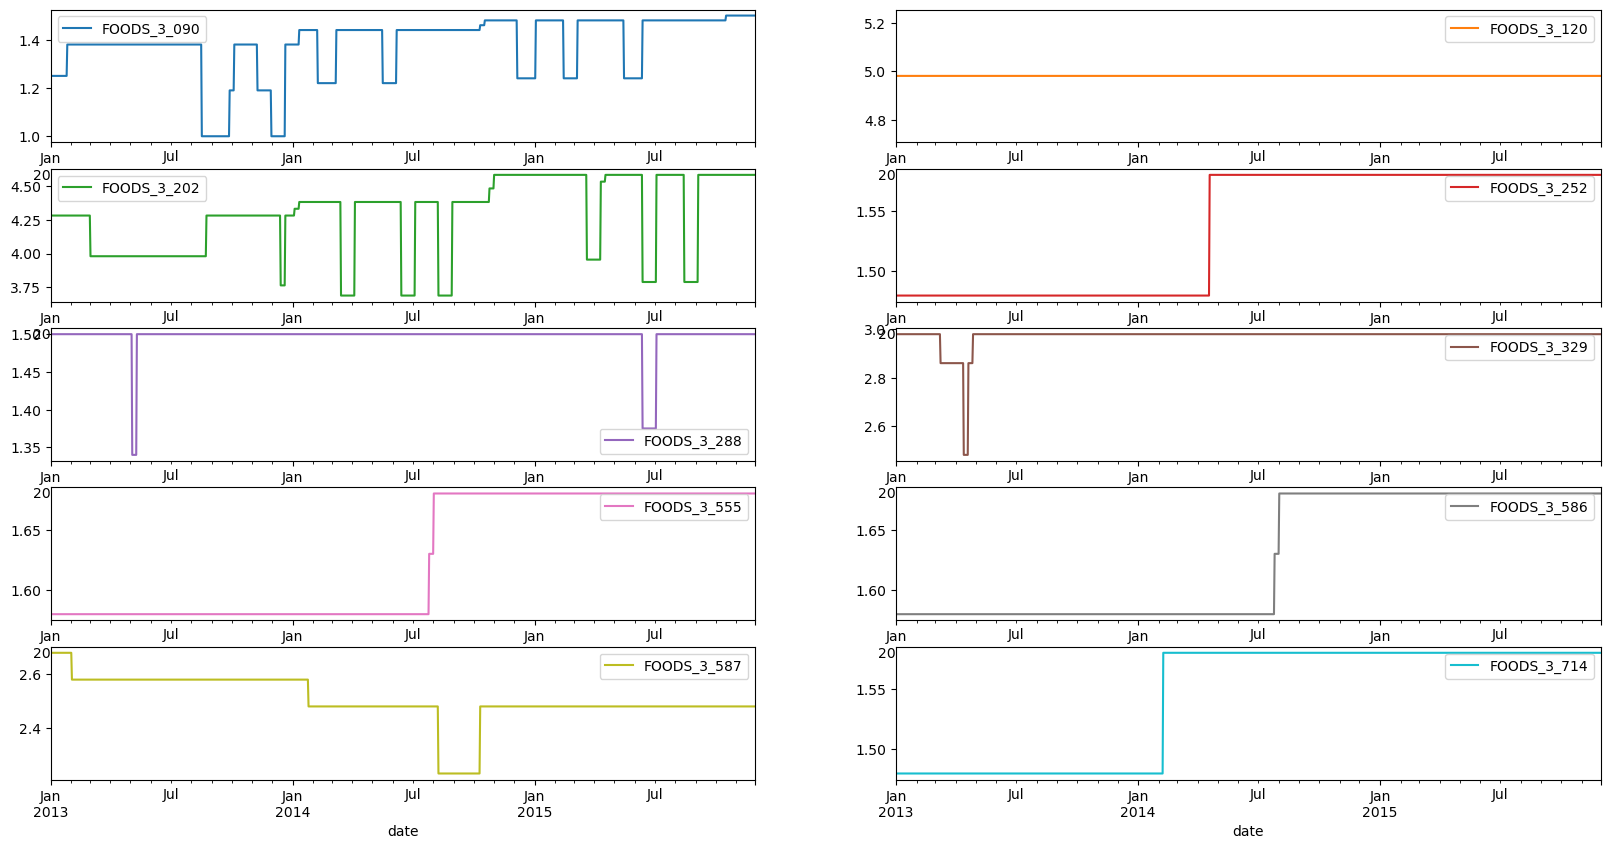

In [32]:

df.groupby(['date','item_id']).sell_price.mean().\
unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,10));


In [38]:
# creating variables reacting to a price change may help the algorythm

##### product seasonality

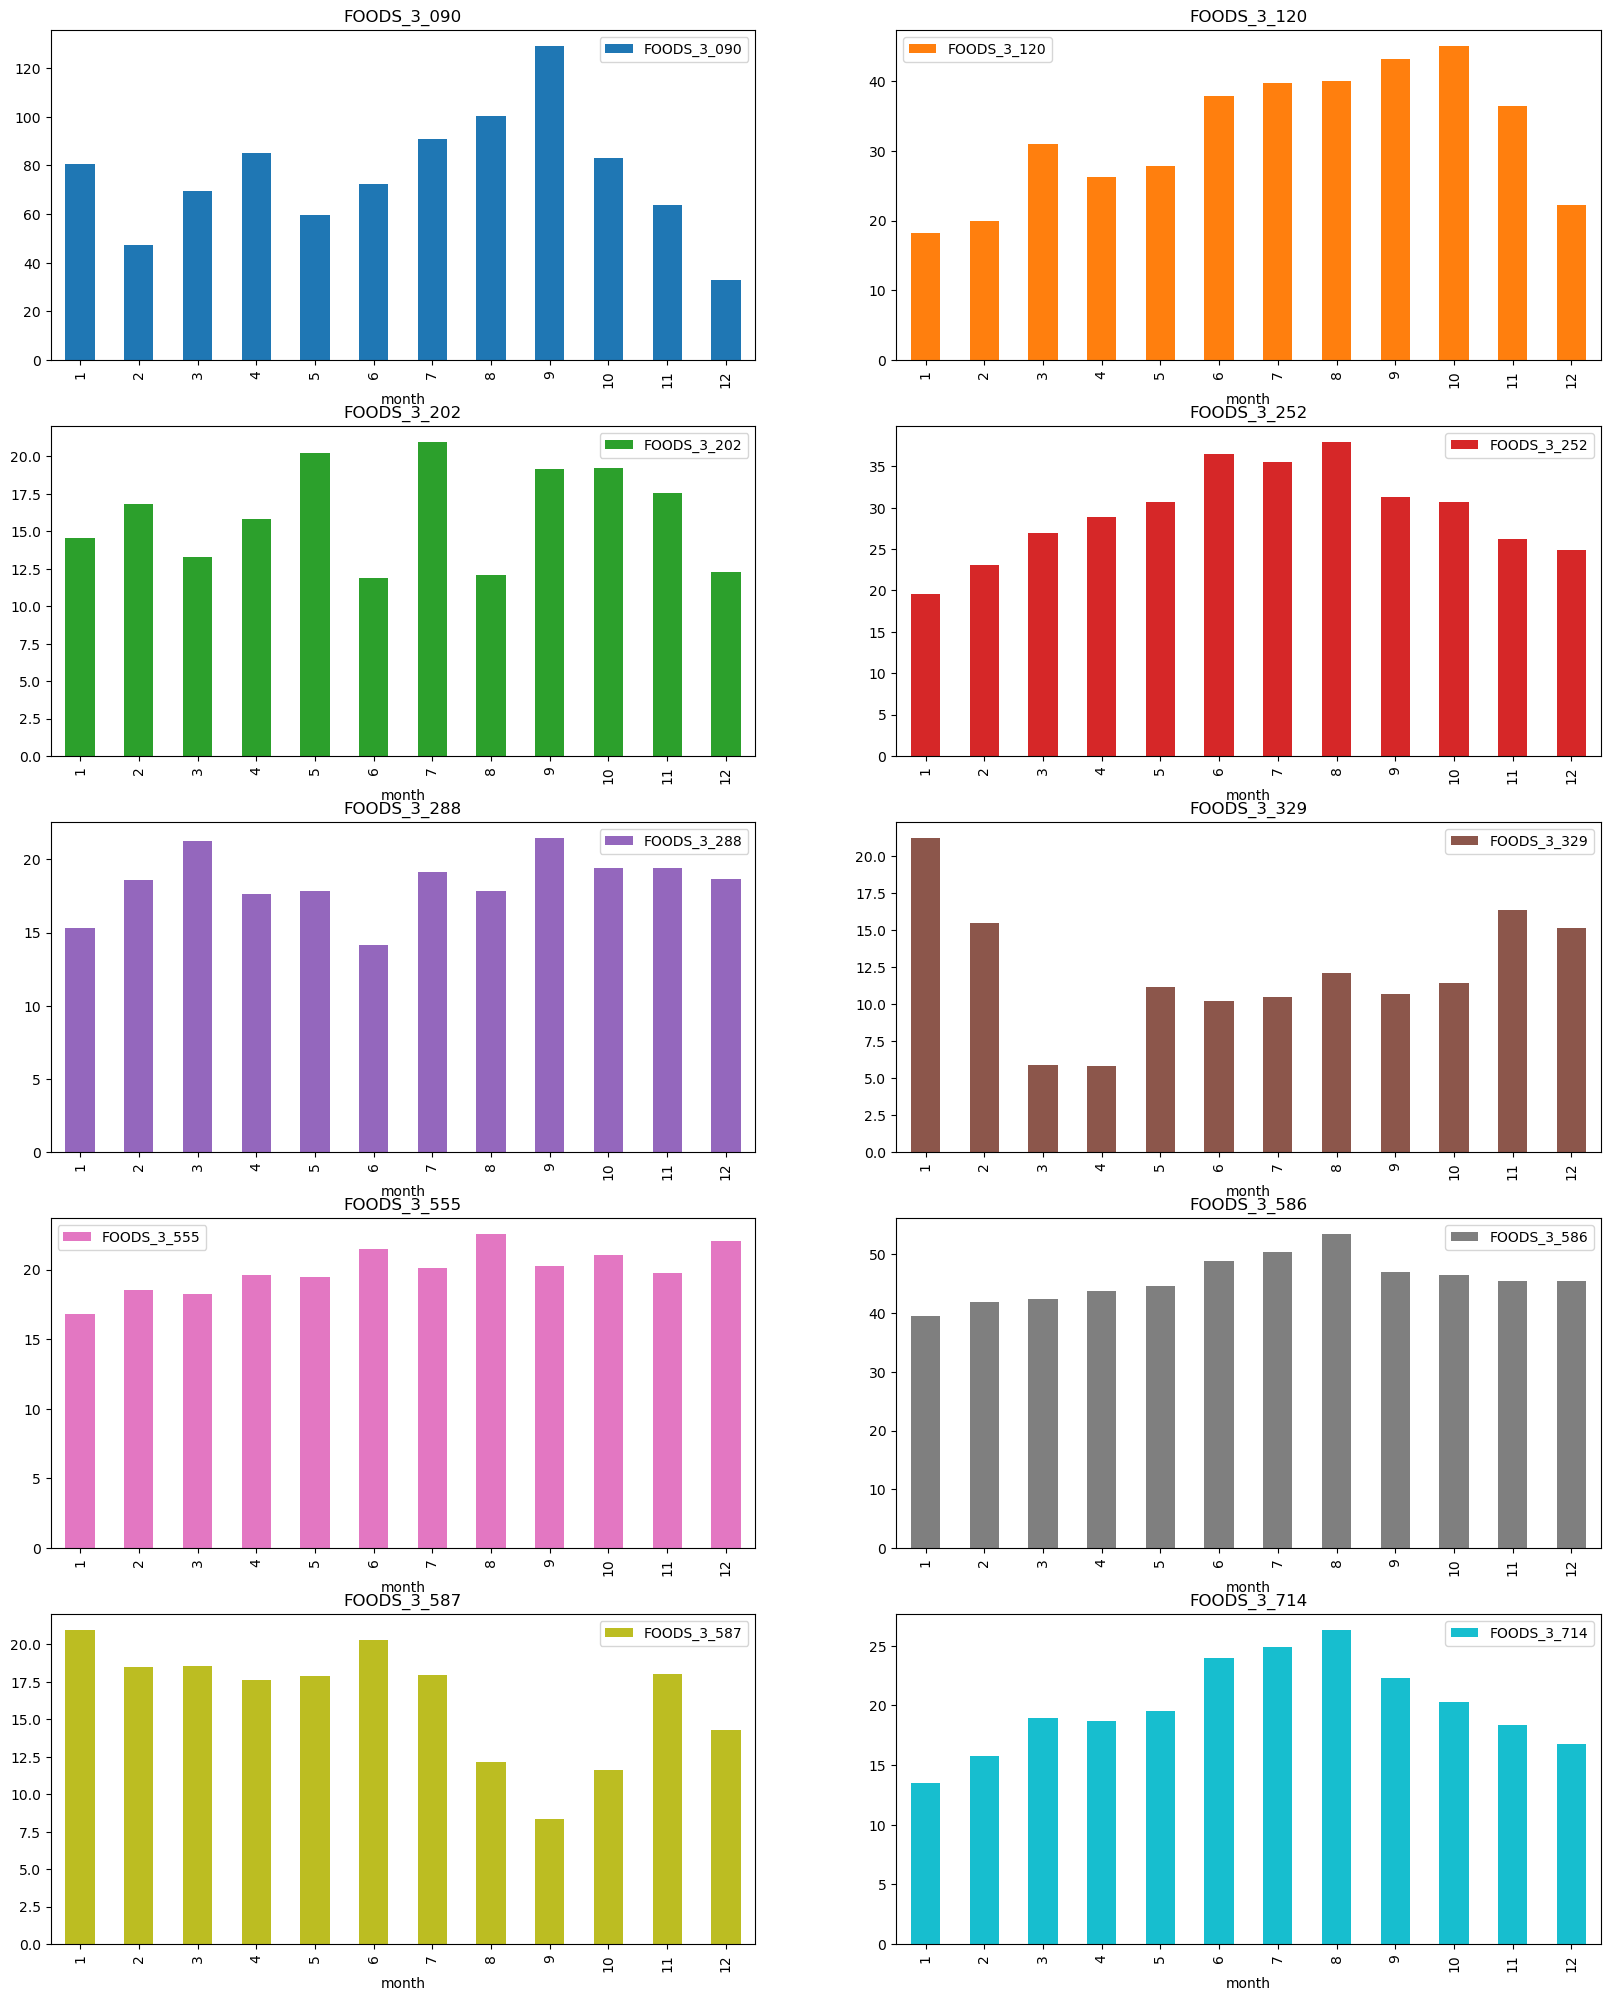

In [34]:
df.groupby(['month','item_id']).sales.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));


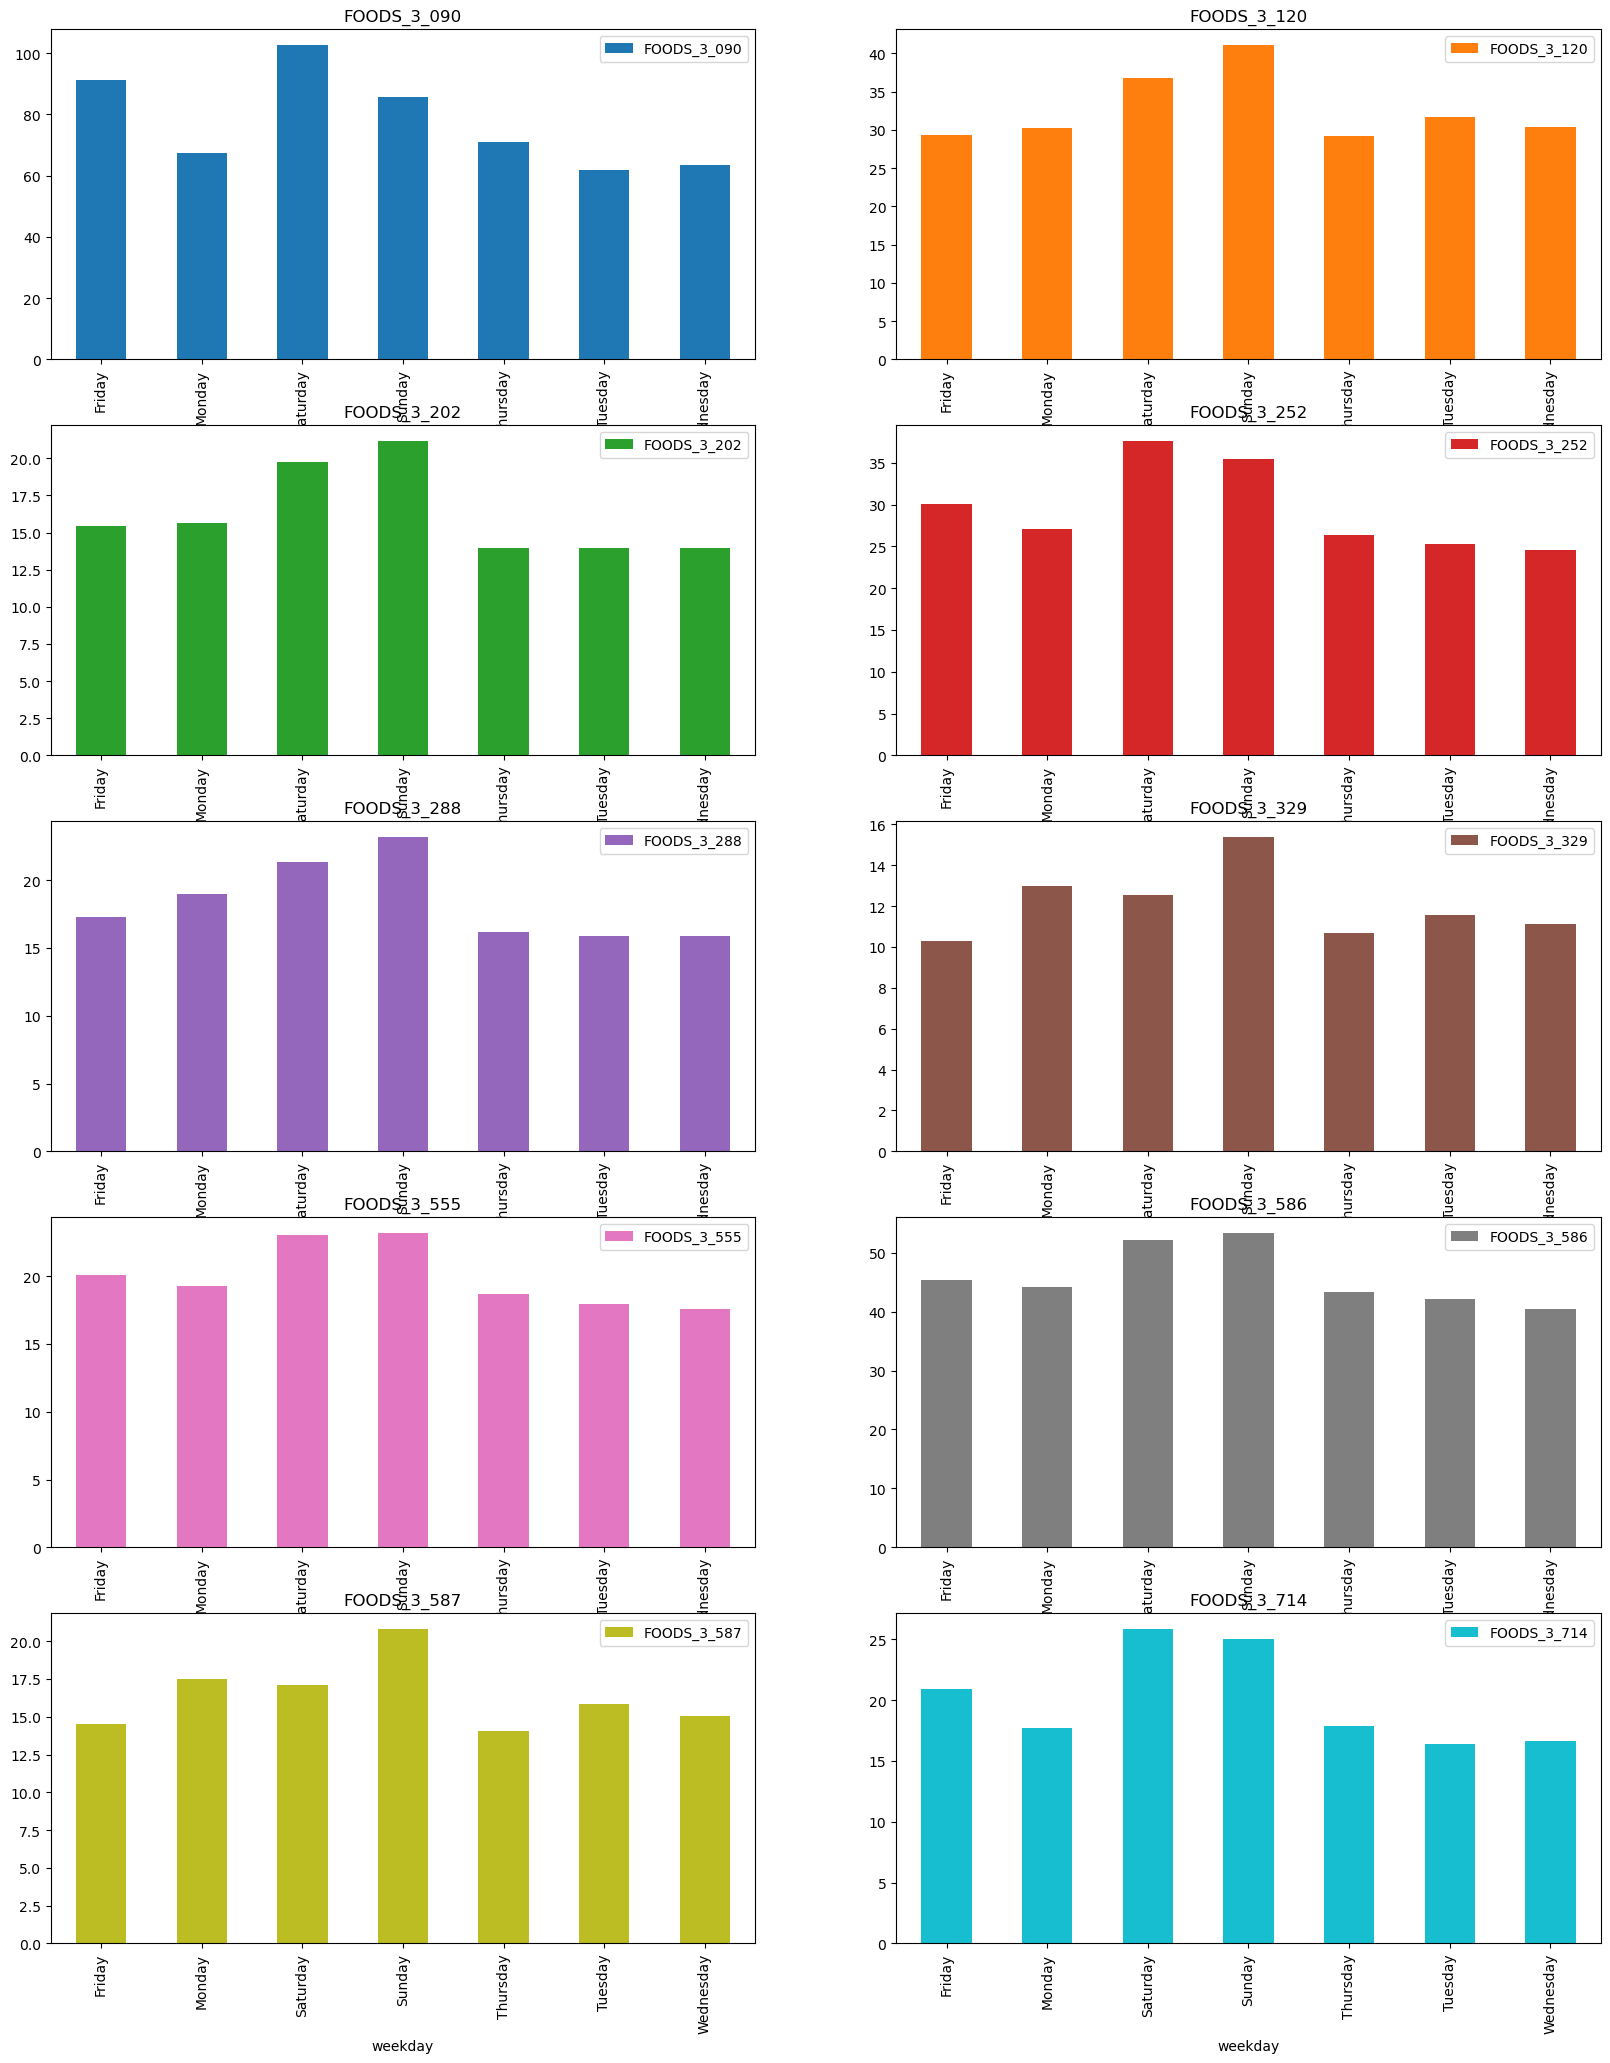

In [35]:

df.groupby(['weekday','item_id']).sales.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));


##### Seasonality by event

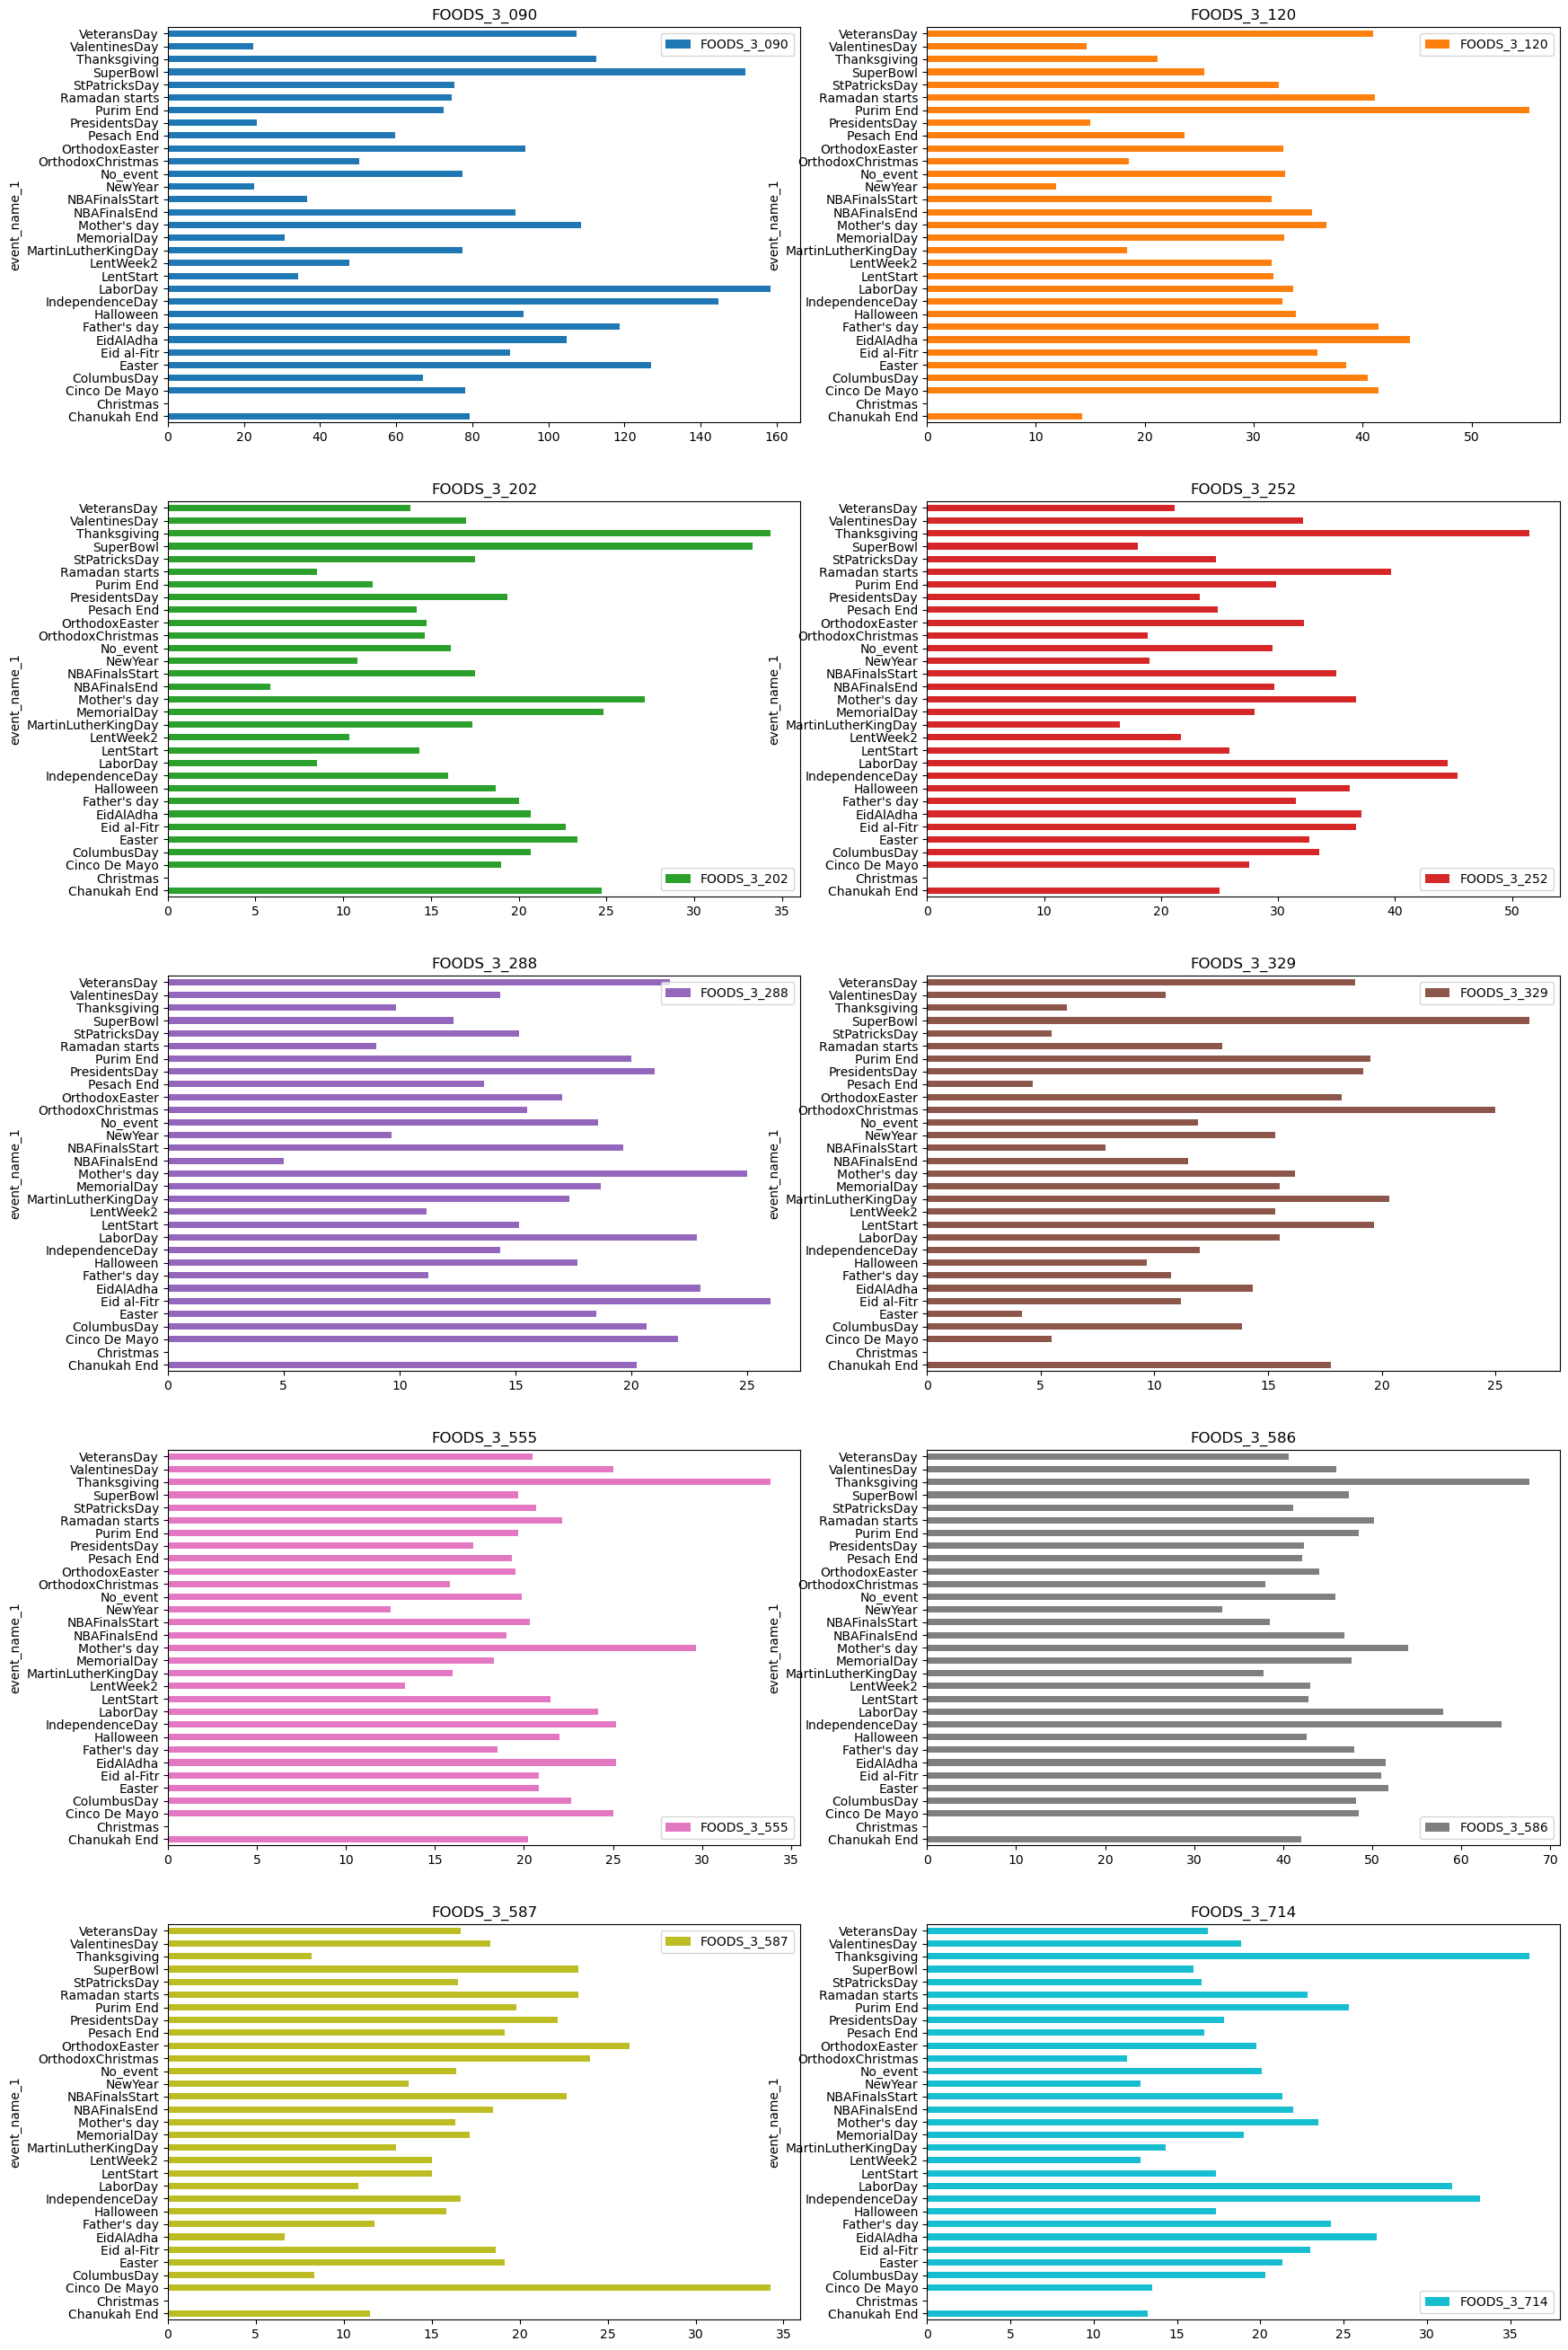

In [37]:
df.groupby(['event_name_1','item_id']).sales.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));


##### Seasonality by type of event

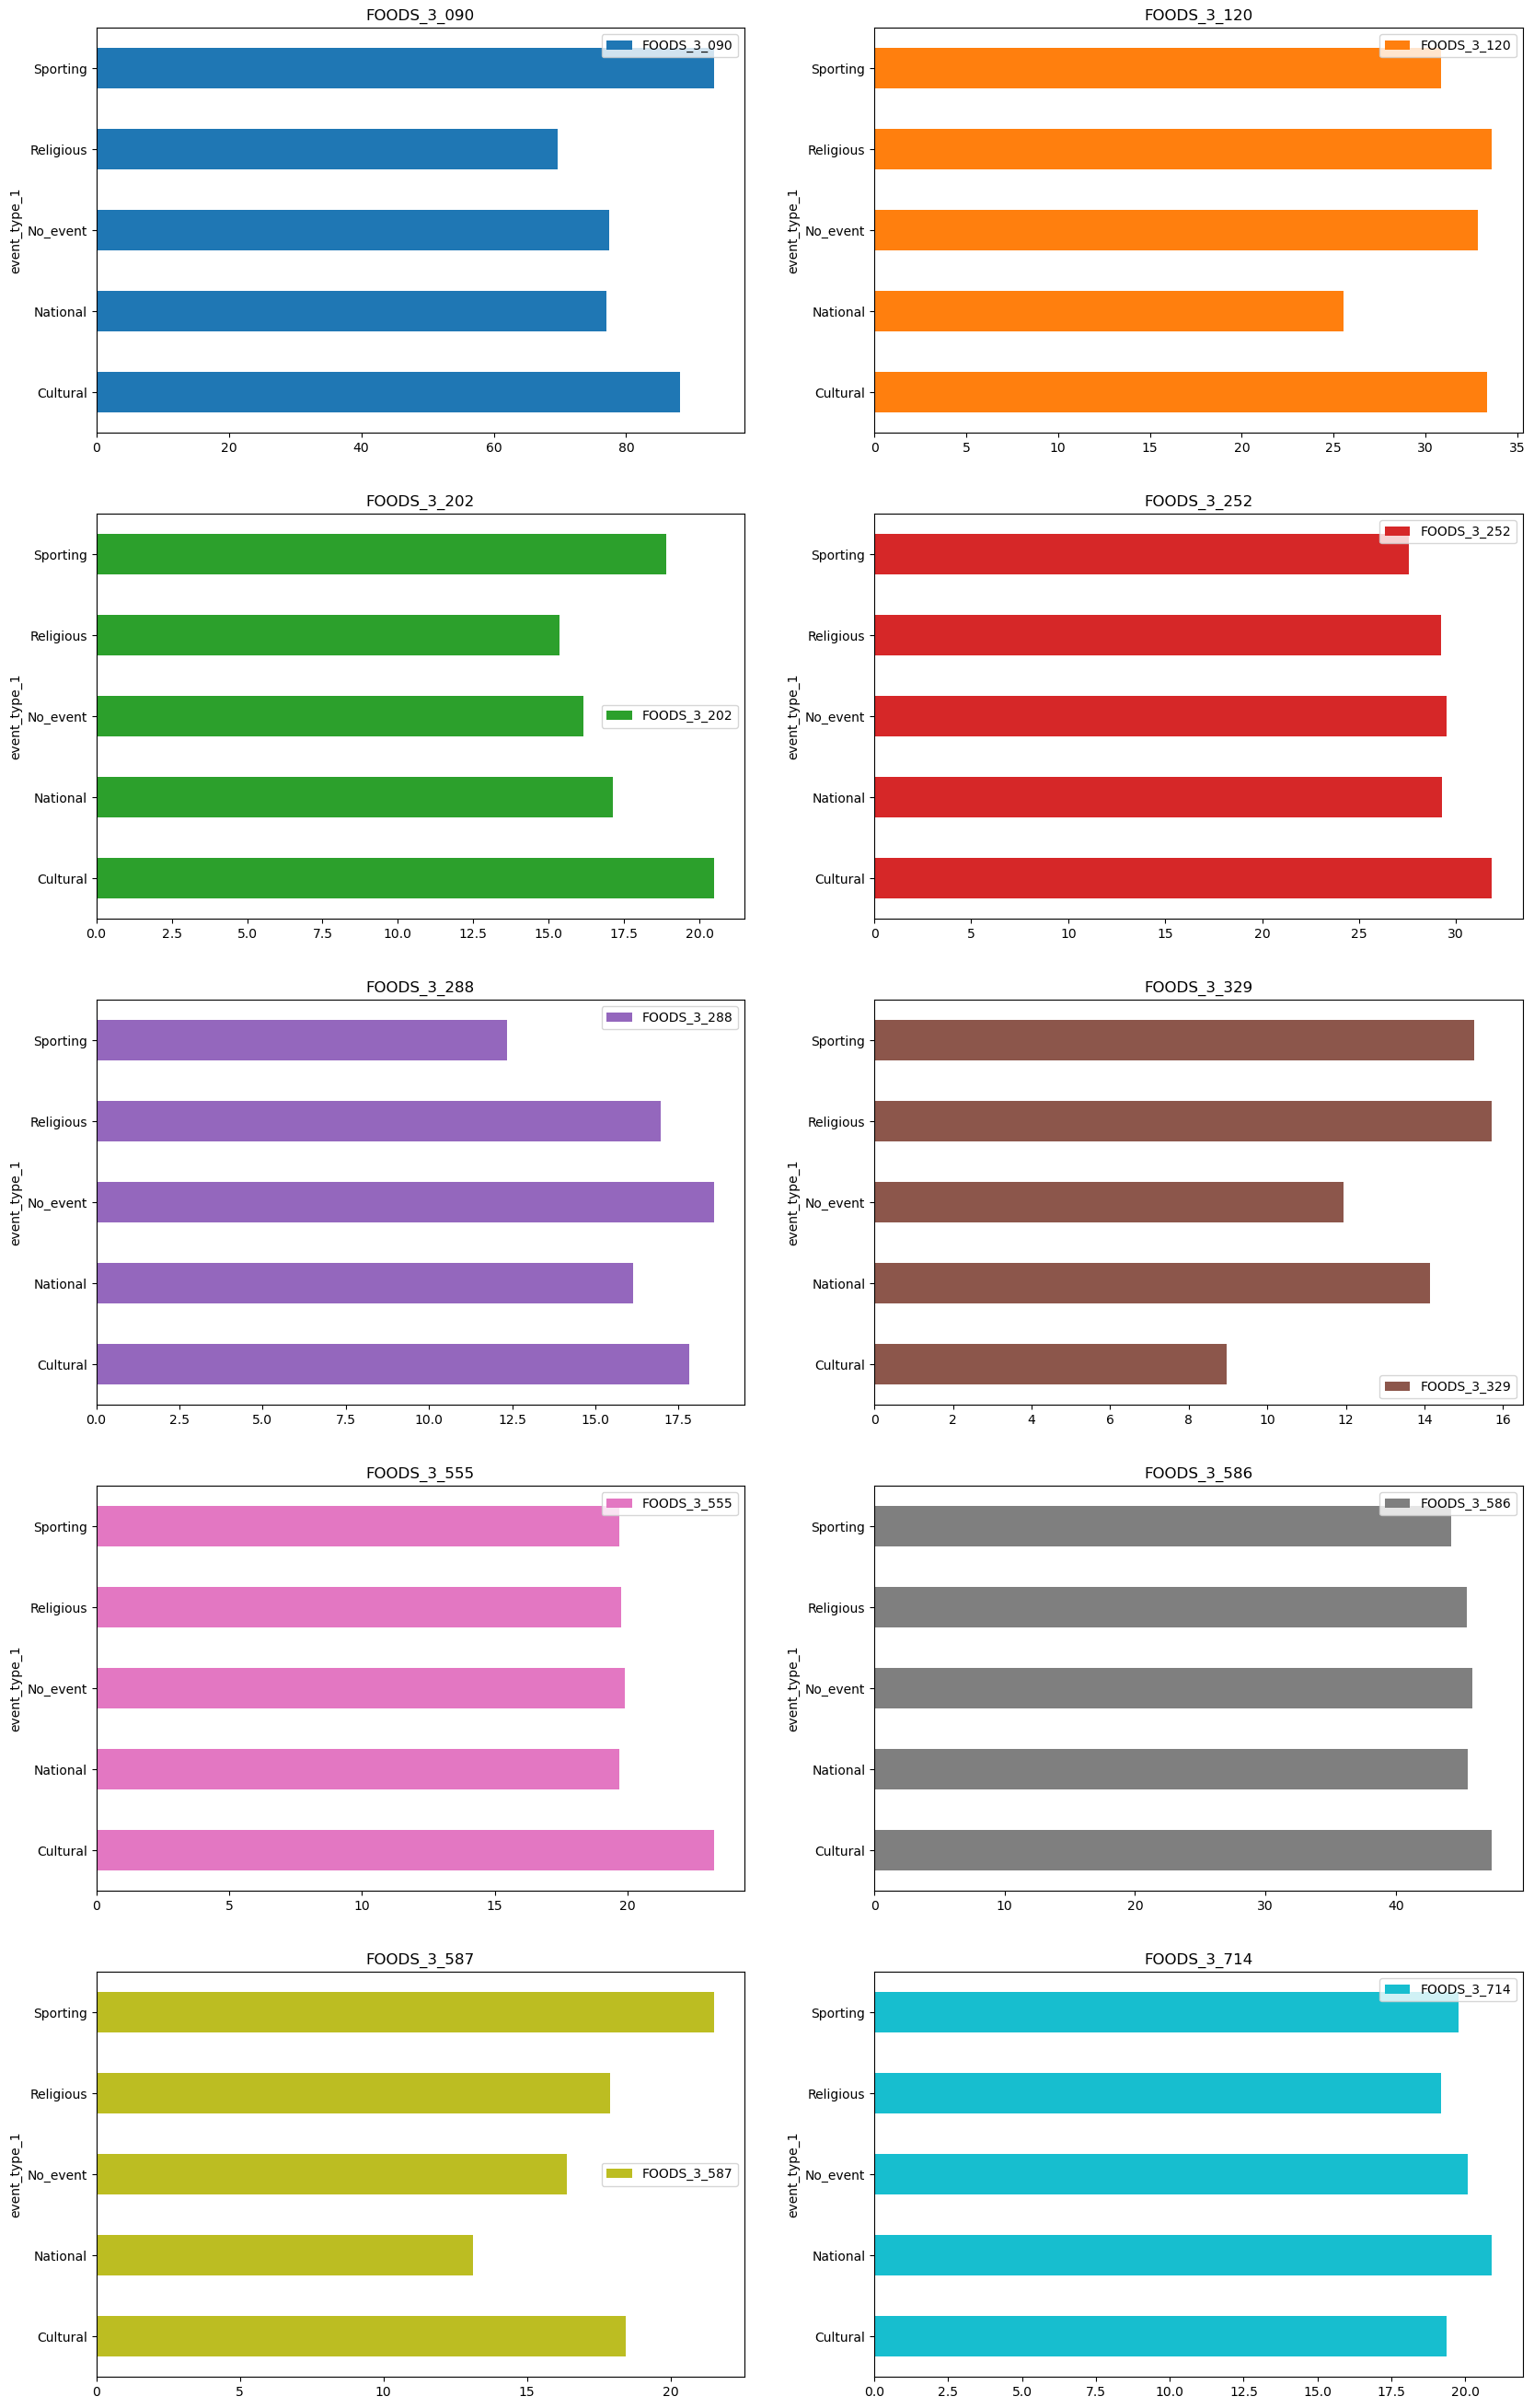

In [39]:
df.groupby(['event_type_1','item_id']).sales.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

### Save datasets after EDA

In [40]:

cat.to_pickle('../../02_Data/03_Work/cat_result_eda.pickle')
num.to_pickle('../../02_Data/03_Work/num_result_eda.pickle')
